In [7]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.2/9.3 MB 5.8 MB/s eta 0:00:02
   - -------------------------------------- 0.4/9.3 MB 5.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.3 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.3 MB 6.4 MB/s e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importing the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [3]:
customer_data = pd.read_csv(r'C:\Users\johns\Desktop\Classification of customers using K Means\Mall_Customers.csv')


In [4]:
import os
print(os.getcwd())


c:\Users\johns\Desktop\Classification of customers using K Means


In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k rupees),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [6]:
customer_data.shape

(1200, 5)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                203 non-null    float64
 1   Gender                    1199 non-null   object 
 2   Age                       1199 non-null   float64
 3   Annual Income (k rupees)  1199 non-null   float64
 4   Spending Score (1-100)    1199 non-null   float64
dtypes: float64(4), object(1)
memory usage: 47.0+ KB


In [8]:
customer_data.isnull().sum()

CustomerID                  997
Gender                        1
Age                           1
Annual Income (k rupees)      1
Spending Score (1-100)        1
dtype: int64

In [9]:
#Choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]].values

In [10]:
print(X)

[[ 15.  39.]
 [ 15.  81.]
 [ 16.   6.]
 ...
 [126.  74.]
 [137.  18.]
 [137.  83.]]


In [11]:

X = X[~np.isnan(X).any(axis=1)]
# finding wcss value for different number of clusters using WCSS -> Within Clusters Sum of Squares

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

c:\Users\johns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\johns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\johns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\johns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

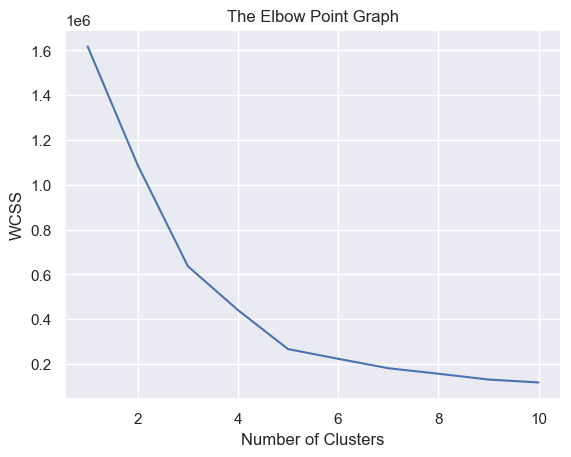

In [12]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 ... 0 2 0]


c:\Users\johns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


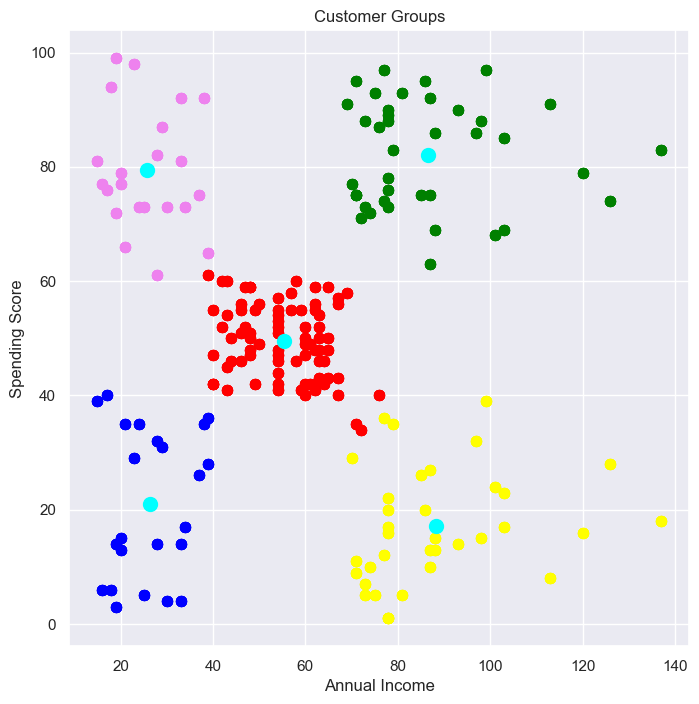

In [14]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()